In [203]:
import numpy as np
import matplotlib.pyplot as plt

In [204]:
from matplotlib.ticker import MultipleLocator


def plt_basics(xlim=None, ylim=None, figsize=None, set_aspect=True, tick=None):
  if figsize:
    plt.figure(figsize=figsize)

  if set_aspect:
    plt.gca().set_aspect('equal', adjustable='box')

  plt.axhline(0, color='black', linewidth=0.5)
  plt.axvline(0, color='black', linewidth=0.5)
  plt.grid(True)

  if xlim:
    plt.xlim(xlim)
  if ylim:
    plt.ylim(ylim)

  if tick:
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(tick))
    ax.yaxis.set_major_locator(MultipleLocator(tick))

In [205]:
def plt_vector(tail, head):
  quiver_args = dict(angles='xy', scale_units='xy', scale=1)
  plt.quiver(*tail, *head, **quiver_args)


def plt_line(start, end, style='g--', alpha=0.5):
  plt.plot([start[0], end[0]], [start[1], end[1]], style, alpha=alpha)

In [206]:
x1 = [5, 2]
x2 = [1, 0]
x3 = [7, 4]
x4 = [4, 6]
x5 = [2, 1]

X = np.array([x1, x2, x3, x4, x5]).T
X.shape
X

(2, 5)

array([[5, 1, 7, 4, 2],
       [2, 0, 4, 6, 1]])

In [207]:
X_mean = X.mean(axis=1).reshape(-1, 1)
X = X - X_mean
X

array([[ 1.2, -2.8,  3.2,  0.2, -1.8],
       [-0.6, -2.6,  1.4,  3.4, -1.6]])

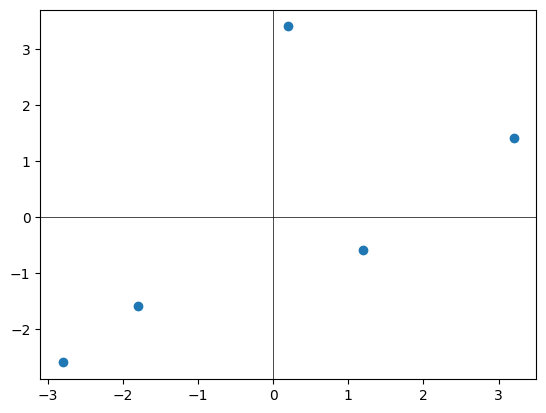

In [208]:
_ = plt.scatter(X[0], X[1])
_ = plt.axhline(0, color='black', linewidth=0.5)
_ = plt.axvline(0, color='black', linewidth=0.5)

In [209]:
n = X.shape[1]
C = X @ X.T / n
C
C.shape

array([[4.56, 2.92],
       [2.92, 4.64]])

(2, 2)

In [210]:
eigenvalues, eigenvectors = np.linalg.eig(C)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

eigenvalues
eigenvectors

array([7.52027396, 1.67972604])

array([[-0.70224734, -0.71193305],
       [-0.71193305,  0.70224734]])

In [211]:
W = eigenvectors

# W = np.array([
#     [1, 0],
#     [0, 1]
# ]).T

W

array([[-0.70224734, -0.71193305],
       [-0.71193305,  0.70224734]])

# coefficients `c = x'w`

In [212]:
X.T.shape, W.shape
coefficients = X.T @ W
coefficients
coefficients.shape

((5, 2), (2, 2))

array([[-0.41553698, -1.27566807],
       [ 3.81731849,  0.16756946],
       [-3.24389776, -1.29503949],
       [-2.56102185,  2.24525435],
       [ 2.4031381 ,  0.15788375]])

(5, 2)

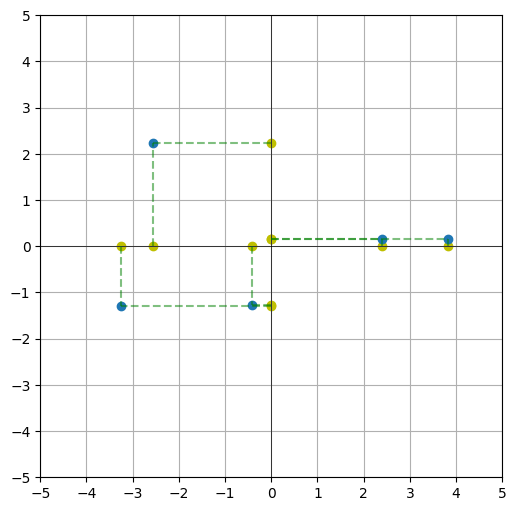

In [213]:
plt_basics(xlim=(-5, 5), ylim=(-5, 5), tick=1, figsize=(6, 6))
_ = plt.scatter(coefficients[:, 0], [0]*n, color='y')
_ = plt.scatter([0]*n, coefficients[:, 1], color='y')
_ = plt.scatter(coefficients[:, 0], coefficients[:, 1])

for i in range(n):
  blue = coefficients[i]
  plt_line(start=(blue[0], 0), end=blue)
  plt_line(start=(0, blue[1]), end=blue)

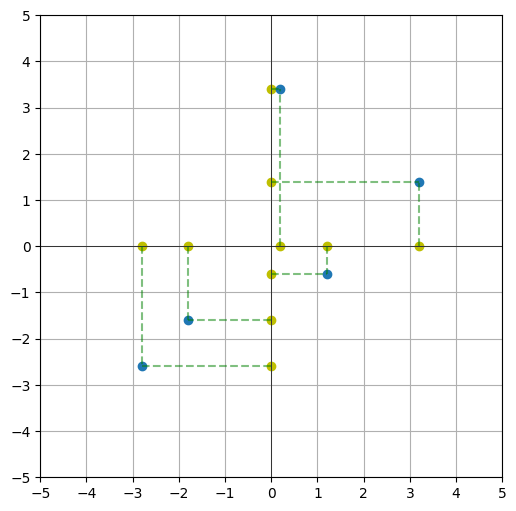

In [214]:
plt_basics(xlim=(-5, 5), ylim=(-5, 5), tick=1, figsize=(6, 6))
_ = plt.scatter(X[0], [0]*n, color='y')
_ = plt.scatter([0]*n, X[1], color='y')
_ = plt.scatter(X[0], X[1])

for i in range(n):
  blue = X[:, i]
  plt_line(start=(blue[0], 0), end=blue)
  plt_line(start=(0, blue[1]), end=blue)

In [215]:
X.T  # standard basis
coefficients  # W basis

array([[ 1.2, -0.6],
       [-2.8, -2.6],
       [ 3.2,  1.4],
       [ 0.2,  3.4],
       [-1.8, -1.6]])

array([[-0.41553698, -1.27566807],
       [ 3.81731849,  0.16756946],
       [-3.24389776, -1.29503949],
       [-2.56102185,  2.24525435],
       [ 2.4031381 ,  0.15788375]])

In [216]:
cw1_1, cw1_2, cw1_3, cw1_4, cw1_5 = coefficients[:, 0]
cw2_1, cw2_2, cw2_3, cw2_4, cw2_5 = coefficients[:, 1]
w1 = W[:, 0]
w2 = W[:, 1]

In [217]:
X.T

array([[ 1.2, -0.6],
       [-2.8, -2.6],
       [ 3.2,  1.4],
       [ 0.2,  3.4],
       [-1.8, -1.6]])

In [218]:
proxy_x1w1 = cw1_1 * w1
proxy_x2w1 = cw1_2 * w1
proxy_x3w1 = cw1_3 * w1
proxy_x4w1 = cw1_4 * w1
proxy_x5w1 = cw1_5 * w1

proxy_x1w2 = cw2_1 * w2
proxy_x2w2 = cw2_2 * w2
proxy_x3w2 = cw2_3 * w2
proxy_x4w2 = cw2_4 * w2
proxy_x5w2 = cw2_5 * w2

x1_ = proxy_x1w1 + proxy_x1w2
x2_ = proxy_x2w1 + proxy_x2w2
x3_ = proxy_x3w1 + proxy_x3w2
x4_ = proxy_x4w1 + proxy_x4w2
x5_ = proxy_x5w1 + proxy_x5w2

In [219]:
X

np.array([
    x1_,
    x2_,
    x3_,
    x4_,
    x5_,
]).T

array([[ 1.2, -2.8,  3.2,  0.2, -1.8],
       [-0.6, -2.6,  1.4,  3.4, -1.6]])

array([[ 1.2, -2.8,  3.2,  0.2, -1.8],
       [-0.6, -2.6,  1.4,  3.4, -1.6]])

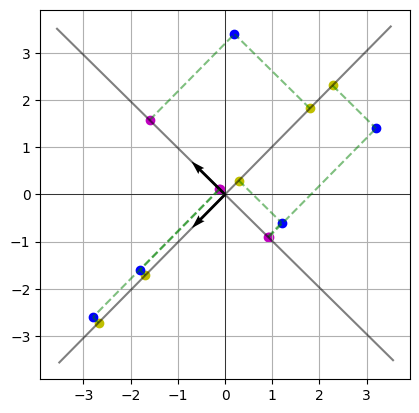

In [220]:
plt_basics()

_ = plt.scatter(*proxy_x1w1, color='y')
_ = plt.scatter(*proxy_x2w1, color='y')
_ = plt.scatter(*proxy_x3w1, color='y')
_ = plt.scatter(*proxy_x4w1, color='y')
_ = plt.scatter(*proxy_x5w1, color='y')

_ = plt.scatter(*proxy_x1w2, color='m')
_ = plt.scatter(*proxy_x2w2, color='m')
_ = plt.scatter(*proxy_x3w2, color='m')
_ = plt.scatter(*proxy_x4w2, color='m')
_ = plt.scatter(*proxy_x5w2, color='m')

_ = plt.scatter(*x1_, color='b')
_ = plt.scatter(*x2_, color='b')
_ = plt.scatter(*x3_, color='b')
_ = plt.scatter(*x4_, color='b')
_ = plt.scatter(*x5_, color='b')

plt_line(start=proxy_x1w1, end=x1_)
plt_line(start=proxy_x2w1, end=x2_)
plt_line(start=proxy_x3w1, end=x3_)
plt_line(start=proxy_x4w1, end=x4_)
plt_line(start=proxy_x5w1, end=x5_)

plt_line(start=proxy_x1w2, end=x1_)
plt_line(start=proxy_x2w2, end=x2_)
plt_line(start=proxy_x3w2, end=x3_)
plt_line(start=proxy_x4w2, end=x4_)
plt_line(start=proxy_x5w2, end=x5_)

plt_vector(tail=(0, 0), head=w1)
plt_vector(tail=(0, 0), head=w2)
plt_line(start=w1*-5, end=w1*5, style='k')
plt_line(start=w2*-5, end=w2*5, style='k')

In [221]:
c1, c2 = coefficients.T
w1, w2 = W.T

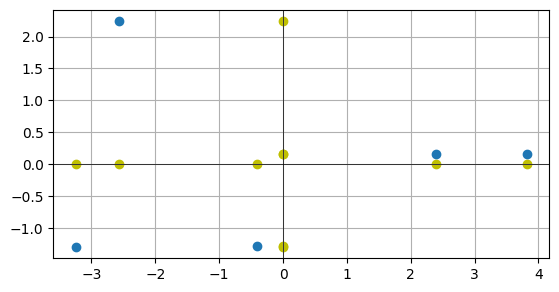

In [222]:
plt_basics()
_ = plt.scatter(c1, [0]*n, color='y')
_ = plt.scatter([0]*n, c2, color='y')
_ = plt.scatter(c1, c2)

# proxies `x' = c.w`

In [223]:
proxies_w1 = c1.reshape(-1, 1) @ w1.reshape(1, -1)
proxies_w2 = c2.reshape(-1, 1) @ w2.reshape(1, -1)

proxies_w1
proxies_w2

array([[ 0.29180974,  0.29583451],
       [-2.68070176, -2.71767521],
       [ 2.27801858,  2.30943804],
       [ 1.79847078,  1.82327611],
       [-1.68759734, -1.71087344]])

array([[ 0.90819026, -0.89583451],
       [-0.11929824,  0.11767521],
       [ 0.92198142, -0.90943804],
       [-1.59847078,  1.57672389],
       [-0.11240266,  0.11087344]])

In [224]:
X_new = (proxies_w1).T
X
X_new
np.sqrt(np.mean((X - X_new) ** 2))  # root mean squared error

array([[ 1.2, -2.8,  3.2,  0.2, -1.8],
       [-0.6, -2.6,  1.4,  3.4, -1.6]])

array([[ 0.29180974, -2.68070176,  2.27801858,  1.79847078, -1.68759734],
       [ 0.29583451, -2.71767521,  2.30943804,  1.82327611, -1.71087344]])

np.float64(0.9164404072957945)

In [225]:
c1
w1

array([-0.41553698,  3.81731849, -3.24389776, -2.56102185,  2.4031381 ])

array([-0.70224734, -0.71193305])

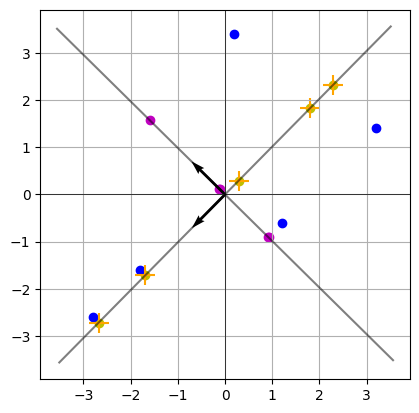

In [226]:
plt_basics()

_ = plt.scatter(*proxies_w1.T, color='y')
_ = plt.scatter(*proxies_w2.T, color='m')
_ = plt.scatter(*X, color='b')  # original samples
_ = plt.scatter(*X_new, marker='+', s=200, color='orange')  # reconstructed samples

plt_vector((0, 0), w1)
plt_vector((0, 0), w2)
plt_line(w1*-5, w1*5, style='k-')
plt_line(w2*-5, w2*5, style='k-')

# for i in range(n):
#   plus = X[:, i]
#   plt_line(proxies_w1[i], plus)
#   plt_line(proxies_w2[i], plus)

# going back

In [228]:
eigenvalues
eigenvectors

array([7.52027396, 1.67972604])

array([[-0.70224734, -0.71193305],
       [-0.71193305,  0.70224734]])

# `c = x'w` and `x proxy = c.w`

In [248]:
money = np.array([90, 35, 20, 10, 2])
np.cumsum(money) / sum(money)

array([0.57324841, 0.79617834, 0.92356688, 0.98726115, 1.        ])

In [270]:
A = np.array([
    [10, 20, 30, 40],
    [50, 60, 70, 80]
])

k = 4
A[:, :k]

array([[10, 20, 30, 40],
       [50, 60, 70, 80]])

In [271]:
np.cumsum(eigenvalues) / sum(eigenvalues)

array([0.81742108, 1.        ])

In [296]:
k = 2
W = eigenvectors[:, :k]
W

array([[-0.70224734, -0.71193305],
       [-0.71193305,  0.70224734]])

In [297]:
coefficients = X.T @ W
coefficients

array([[-0.41553698, -1.27566807],
       [ 3.81731849,  0.16756946],
       [-3.24389776, -1.29503949],
       [-2.56102185,  2.24525435],
       [ 2.4031381 ,  0.15788375]])

In [299]:
X_ = (coefficients @ W.T).T
X
X_
np.sqrt(np.mean((X - X_)**2))  # rmse

array([[ 1.2, -2.8,  3.2,  0.2, -1.8],
       [-0.6, -2.6,  1.4,  3.4, -1.6]])

array([[ 1.2, -2.8,  3.2,  0.2, -1.8],
       [-0.6, -2.6,  1.4,  3.4, -1.6]])

np.float64(4.509747244882934e-16)